# Cleaning the dataset

BigSmartSells is a dataset which contains different items/products with their information, and the outlet they came for (and their information)

Goal : to know the sales of products in the outlets

Benefit : to manage the stocks

Difference with the credit card database:
- we have to add LabelEncoder because we have features that are not numerical
- import LinearRegression because we are not going to do classification but regression
- we will not use the accuracy score but mean_squared_error because we have not only 2 values but many

In [ ]:
# Import the dependencies

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading the dataset to a Pandas Dataframe
# Load the dataset from https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

train_data = pd.read_csv("/content/sample_data/Train.csv")
test_data = pd.read_csv("/content/sample_data/Test.csv")

In [ ]:
# Show the 5 first item of the train datasets

train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Show the 5 first item of the test datasets
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# Display the information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


On va devoir faire un tri sur nos données, car on veut avoir que des int ou des float, on doit supprimer les object

In [ ]:
# Find the missing values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Imputing missing values for training dataset
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace = True)
train_data['Outlet_Size'].fillna("Missing", inplace= True)
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Put the "literal values" of columns before the encoding
fat_column = train_data['Item_Fat_Content']
type_column = train_data['Item_Type']
outlet_id_column = train_data['Outlet_Identifier']
outlet_size = train_data['Outlet_Size']
outlet_loc_column = train_data['Outlet_Location_Type']
outlet_type_column = train_data['Outlet_Type']

In [ ]:
# Encode the "literal values" into numerical values

encoder = LabelEncoder()

train_data['Item_Identifier'] = encoder.fit_transform(train_data['Item_Identifier'])

train_data['Item_Fat_Content'] = encoder.fit_transform(train_data['Item_Fat_Content'])

train_data['Item_Type'] = encoder.fit_transform(train_data['Item_Type'])

train_data['Outlet_Identifier'] = encoder.fit_transform(train_data['Outlet_Identifier'])

train_data['Outlet_Size'] = encoder.fit_transform(train_data['Outlet_Size'])

train_data['Outlet_Location_Type'] = encoder.fit_transform(train_data['Outlet_Location_Type'])

train_data['Outlet_Type'] = encoder.fit_transform(train_data['Outlet_Type'])


In [ ]:
# Verifying the encoding worked --> we don't have "literal values"

train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
# Verifying the encoding worked --> we only have integer and float

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [ ]:
# Statistics for Item_Outlet_Sales

train_data.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Deleting the useless column (Item_Identifier)

test_data = test_data.drop(columns='Item_Identifier')

In [ ]:
# Splitting the data info features and target

X = train_data.drop(columns = 'Item_Outlet_Sales', axis=1)
Y = train_data['Item_Outlet_Sales']

In [ ]:
# Splitting the data into Training and testing data sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
# Verifying if the split worked

X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6380,398,20.600000,2,0.048033,6,188.2556,7,2002,2,1,1
825,385,7.070000,1,0.093653,13,113.3834,6,2004,3,1,1
3826,1264,20.750000,1,0.000000,8,149.4734,1,1987,0,2,1
8271,1154,12.857645,2,0.057835,13,57.5562,5,1985,1,2,3
8047,33,13.500000,1,0.000000,14,189.1872,6,2004,3,1,1


In [ ]:
# Verifying if the split of target value worked

Y_train.head()

6380    3755.1120
825     1267.0174
3826    2969.4680
8271    2548.0166
8047    1890.8720
Name: Item_Outlet_Sales, dtype: float64

# Learning phase

In [ ]:
#Model training
#Linear regression

model = LinearRegression()

In [ ]:
# Training the Linear regression with X_train

model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Model evaluation with Mean Squared Error, Root Mean Squared Error

Y_train_pred = model.predict(X_train)
MSE = mean_squared_error(Y_train, Y_train_pred)
RMSE = math.sqrt(MSE)
#print('Mean squared error on training data', MSE)
print('Root mean squared error on training data', RMSE)
Y_test_pred = model.predict(X_test)
MSE_test = mean_squared_error(Y_test_pred, Y_test)
RMSE_test = math.sqrt(MSE_test)
#print('Mean squared error on test data', MSE_test)
print ('Root mean squared error on test data', RMSE_test)

Root mean squared error on training data 1210.625587881861
Root mean squared error on test data 1183.0102933742064


We can see that the value of RMSE for training data and RMSE for test data are close. So, the model is proprely fitted.

MSE : an estimator measures the average of the squares of the errors

RMSE : root of MSE

Accuracy score : correct classification / all the classification

In [ ]:
# Model evaluation with R2 Score (coefficient de determination)

r2_train  = r2_score (Y_train, Y_train_pred)
r2_test = r2_score(Y_test,Y_test_pred)
print (r2_train)
print (r2_test)

0.5004945736901493
0.5106009627692674


The R2 Score is the proportion of the variation in the dependent variable that is predictable from the indepedent variable(s). Then, it determines the quality of our model in percentage.

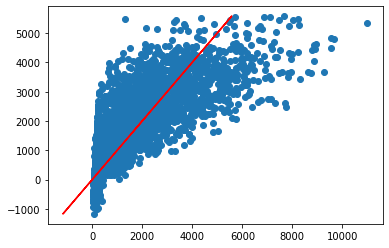

In [ ]:
# Graph of the linear regression

plt.scatter(Y_test, Y_test_pred)
plt.plot(Y_test_pred, Y_test_pred, color='r')

Our result (in blue) is close to the linear regression (in red).

## Data visualisation

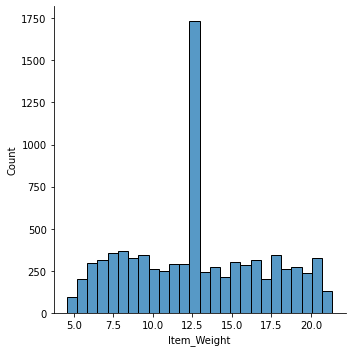

In [ ]:
# Bar chart of the repartition of the weight item

sns.displot(train_data['Item_Weight'])

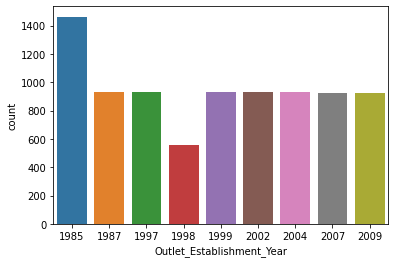

In [ ]:
# Bar chart of the establishment of the outlet (by year)

sns.countplot(x='Outlet_Establishment_Year', data=train_data)
plt.show()

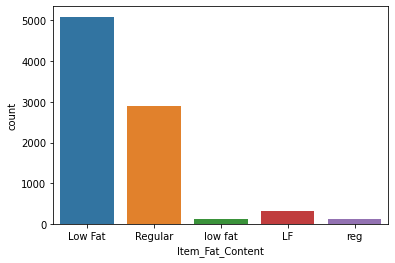

In [ ]:
# Bar chart of the item fat content

sns.countplot(x=fat_column, data=train_data)
plt.show()

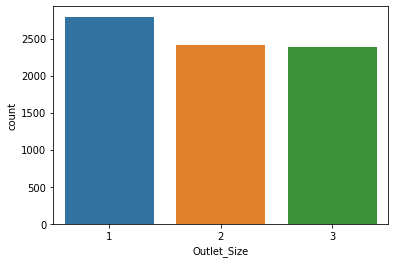

In [ ]:
# Bar chart of the repartition of outlet size

outlet_size_new = train_data[train_data['Outlet_Size']>0]
outlet_size_new = outlet_size_new['Outlet_Size']

sns.countplot(x=outlet_size_new, data=train_data)
plt.show()

1 = Small, 2 = Medium, 3 = High

In [ ]:
coor = train_data.corr()
fig = px.imshow(coor, text_auto=True, aspect="auto")
fig.show()